## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [18]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [19]:
# 設定 data_path
dir_data = 'C:/Users/User/Desktop/100Day-ML-Marathon/data'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [20]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


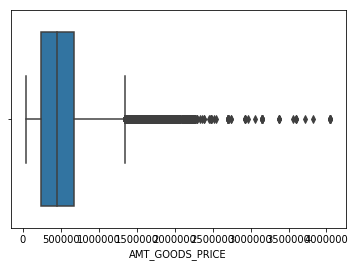

In [21]:

sns.boxplot(app_train['AMT_GOODS_PRICE'])
plt.show()

In [22]:
app_train["AMT_GOODS_PRICE_BINNED"] = pd.qcut(app_train['AMT_GOODS_PRICE'], q=10)
app_train["AMT_GOODS_PRICE_BINNED"].value_counts()


(522000.0, 675000.0]      42417
(40499.999, 180000.0]     39484
(373500.0, 450000.0]      35052
(180000.0, 225000.0]      31970
(814500.0, 1093500.0]     30745
(1093500.0, 4050000.0]    30685
(225000.0, 270000.0]      27990
(450000.0, 522000.0]      26475
(270000.0, 373500.0]      23483
(675000.0, 814500.0]      18932
Name: AMT_GOODS_PRICE_BINNED, dtype: int64

In [29]:
GOODS_PRICE = app_train[["TARGET","AMT_GOODS_PRICE"]].copy()
GOODS_PRICE["AMT_GOODS_PRICE_BINNED"] = pd.qcut(app_train['AMT_GOODS_PRICE'],q=10)
GOODS_PRICE.head()

,TARGET,AMT_GOODS_PRICE,AMT_GOODS_PRICE_BINNED
0,1,351000.0,"(270000.0, 373500.0]"
1,0,1129500.0,"(1093500.0, 4050000.0]"
2,0,135000.0,"(40499.999, 180000.0]"
3,0,297000.0,"(270000.0, 373500.0]"
4,0,513000.0,"(450000.0, 522000.0]"
5,0,454500.0,"(450000.0, 522000.0]"
6,0,1395000.0,"(1093500.0, 4050000.0]"
7,0,1530000.0,"(1093500.0, 4050000.0]"
8,0,913500.0,"(814500.0, 1093500.0]"
9,0,405000.0,"(373500.0, 450000.0]"


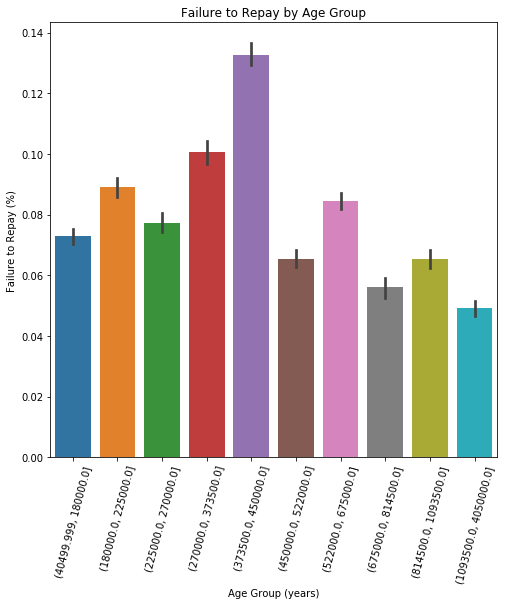

In [32]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot

px = 'AMT_GOODS_PRICE_BINNED'
py = 'TARGET'
sns.barplot(px, py,data=GOODS_PRICE)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('GOODS_PRICE'); plt.ylabel('TARGET')
plt.title('TARGET by AMT_GOODS_PRICE_BINNED ');